# Why Numpy & Pandas?  107.07

两个科学运算当中最为重要的两个模块，一个是 numpy,一个是 pandas。

运算速度快：numpy 和 pandas 都是采用 C 语言编写, pandas 又是基于 numpy, 是 numpy 的升级版本。
消耗资源少：采用的是矩阵运算，会比 python 自带的字典或者列表快好多

应用:数据分析、机器学习、深度学习

# Pandas 基本介绍
## Numpy 和 Pandas 有什么不同

如果用 python 的列表和字典来作比较, 那么可以说 Numpy 是列表形式的，没有数值标签，而 Pandas 就是字典形式。Pandas是基于Numpy构建的，让Numpy为中心的应用变得更加简单。

要使用pandas，首先需要了解他主要两个数据结构：Series和DataFrame。

## 两个数据结构：Series和DataFrame

In [1]:
#Series

import pandas as pd
import numpy as np

s = pd.Series([1,3,6,np.nan,44,1])
print(s)

#Series的字符串表现形式为：索引在左边，值在右边。

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


### DataFrame是一个表格型的数据结构，它包含有一组有序的列，每列可以是不同的值类型（数值，字符串，布尔值等）。DataFrame既有行索引也有列索引， 它可以被看做由Series组成的大字典。

In [2]:
#DataFrame

dates = pd.date_range('20160101',periods=6) #since20160101往後推六天,period=期間
print(dates)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')


In [3]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
#index=row
print(df)

                   a         b         c         d
2016-01-01 -0.657626 -0.486702 -0.065811  1.186329
2016-01-02  0.219847 -1.262106  0.836697 -0.350872
2016-01-03  1.131888  0.283630 -1.068959  0.302081
2016-01-04  0.614172  0.361205  0.399783  0.636812
2016-01-05 -0.338586 -1.968260 -0.380414 -1.294259
2016-01-06 -0.131054 -1.229496  0.365294 -1.991927


In [4]:
print(df['b'])

2016-01-01   -0.486702
2016-01-02   -1.262106
2016-01-03    0.283630
2016-01-04    0.361205
2016-01-05   -1.968260
2016-01-06   -1.229496
Freq: D, Name: b, dtype: float64


In [5]:
# 创建一组没有给定行标签和列标签的df1数据
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [6]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
                     
#pandas=dict
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [7]:
print(df2.dtypes)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [8]:
print(df2.index)    #index=row

Int64Index([0, 1, 2, 3], dtype='int64')


In [9]:
print(df2.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


In [10]:
#所有df2的值
print(df2.values)

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


In [11]:
#数據的總结(個數、平均、標準差、最大值、最小值與四分位距)
df2.describe() 

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [12]:
print(df2.T)  #transpose 翻转数据

                     0                    1                    2  \
A                    1                    1                    1   
B  2013-01-02 00:00:00  2013-01-02 00:00:00  2013-01-02 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2013-01-02 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  


In [13]:
print(df.sort_index(axis=1,ascending=False)) #from 20160101 to 20160106

                   d         c         b         a
2016-01-01  1.186329 -0.065811 -0.486702 -0.657626
2016-01-02 -0.350872  0.836697 -1.262106  0.219847
2016-01-03  0.302081 -1.068959  0.283630  1.131888
2016-01-04  0.636812  0.399783  0.361205  0.614172
2016-01-05 -1.294259 -0.380414 -1.968260 -0.338586
2016-01-06 -1.991927  0.365294 -1.229496 -0.131054


In [14]:
print(df.sort_index(axis=0,ascending=False)) #from 20160106 to 20160101

                   a         b         c         d
2016-01-06 -0.131054 -1.229496  0.365294 -1.991927
2016-01-05 -0.338586 -1.968260 -0.380414 -1.294259
2016-01-04  0.614172  0.361205  0.399783  0.636812
2016-01-03  1.131888  0.283630 -1.068959  0.302081
2016-01-02  0.219847 -1.262106  0.836697 -0.350872
2016-01-01 -0.657626 -0.486702 -0.065811  1.186329


In [15]:
print(df2.sort_values(by='B'))

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


# Pandas 选择数据

In [16]:
#建立了一个 6X4 的矩阵数据

dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [17]:
print(df.A)  #same as print(df['A'])

2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32


In [18]:
print(df[0:3])  #index since 0 to 2

            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11


In [19]:
print(df['20130102':'20130104'])

             A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15


In [20]:
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


# 根据标签 loc
## 主要通过index的"label_name"選擇某個row的数据

In [21]:
#select by label:loc

print(df.loc['20130102'])   

A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int32


In [22]:
print(df.loc[:,['A','B']]) 

             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21


In [23]:
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


# 根据序列 iloc
### 主要通過"位置position"選擇在不同情况下所需要的數據

In [24]:
#select by position:iloc

print(df.iloc[3:5,1])
print(df.iloc[[1,3,5], 1:3])

2013-01-04    13
2013-01-05    17
Freq: D, Name: B, dtype: int32
             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22


# 根据混合選擇的这两种 ix

In [26]:
#根据混合的这两种 ix
#采用混合选择 ix, 其中选择’A’和’C’的两列，并选择前三行的数据。

print(df.ix[:3,['A','C']])

            A   C
2013-01-01  0   2
2013-01-02  4   6
2013-01-03  8  10


In [27]:
#Boolean indexing

print(df)
print(df[df.A > 8])  #find column A >8

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
             A   B   C   D
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


# Pandas 设置值
## 如何对DataFrame中在自己想要的地方赋值或者增加数据

In [28]:
#先建立了一个 6X4 的矩阵数据。

dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])

print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [29]:
# 根据位置设置 loc 和 iloc
# 利用索引或者标签确定需要修改值的位置

df.iloc[2,2]=1111
df.loc['20130101','B']=2222

print(df)

             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     9  1111  11
2013-01-04  12    13    14  15
2013-01-05  16    17    18  19
2013-01-06  20    21    22  23


In [30]:
#根据条件设置
#更改B中的数, 而更改的位置是取决于 A 的. 对于A大于4的位置. 更改B在相应位置上的数为0

df.B[df.A>4] = 0
print(df)

             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     0  1111  11
2013-01-04  12     0    14  15
2013-01-05  16     0    18  19
2013-01-06  20     0    22  23


In [31]:
# 按行或列设置
df['F'] = np.nan   #add column "F" and insert data "nan"
print(df)

             A     B     C   D   F
2013-01-01   0  2222     2   3 NaN
2013-01-02   4     5     6   7 NaN
2013-01-03   8     0  1111  11 NaN
2013-01-04  12     0    14  15 NaN
2013-01-05  16     0    18  19 NaN
2013-01-06  20     0    22  23 NaN


In [32]:
# 添加数据
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130101',periods=6)) 
print(df)             #add column 'E' and insert data

             A     B     C   D   F  E
2013-01-01   0  2222     2   3 NaN  1
2013-01-02   4     5     6   7 NaN  2
2013-01-03   8     0  1111  11 NaN  3
2013-01-04  12     0    14  15 NaN  4
2013-01-05  16     0    18  19 NaN  5
2013-01-06  20     0    22  23 NaN  6


# Pandas 處理遺失的數據

## 有时候导入或处理数据, 会产生一些空的或者是 NaN 数据,如何删除或者是填补这些 NaN 数据

In [33]:
import pandas as pd
import numpy as np

# 建立了一个6X4的矩阵数据并且把两个位置置为空
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [34]:
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan

print(df)

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


## pd.dropna()

In [35]:
#直接去掉有 NaN 的行或列, 可以使用 dropna

print(df.dropna(axis=0,how='any')) #how={any,all},axis=0 is column

             A     B     C   D
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


## pd.fillna()

In [36]:
#将 NaN 的值用其他值代替, 比如代替成 0

print(df.fillna(value=0)) #把欄位值是NaN全補上0

             A     B     C   D
2013-01-01   0   0.0   2.0   3
2013-01-02   4   5.0   0.0   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


## pd.isnull()

In [37]:
#判断是否有缺失数据 NaN, 为 True 表示缺失数据

print(df.isnull())  #show True/False

                A      B      C      D
2013-01-01  False   True  False  False
2013-01-02  False  False   True  False
2013-01-03  False  False  False  False
2013-01-04  False  False  False  False
2013-01-05  False  False  False  False
2013-01-06  False  False  False  False


In [38]:
#检测在数据中是否存在 NaN, 如果存在就返回 True

np.any(df.isnull()) == True

True

# Pandas 資料讀取與寫入csv

## pandas可以读取与存取的资料格式有很多种，像csv、excel、json、html与pickle等…

In [39]:
import pandas as pd

#读取csv,直接把檔案放在與ipython放在同一層位置，且直接在path位置寫上檔名即可
#data=pd.read.csv("path.csv")

#打印出data、第一行自動加上索引
#print(data)

#寫入csv檔並增加檔名
#data.to_csv("table_name")

# Pandas 合并 concat

pandas处理多组数据的时候往往会要用到数据的合并处理
使用 concat是一种基本的合并方式.而且concat中有很多参数可以调整,合并成你想要的数据形式

## axis (合并方向)

In [40]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

print(df1)
print(df2)
print(df3)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [41]:
#concat row合并
#axis=0是预设值，因此未设定任何参数时，函数默认axis=0
res = pd.concat([df1, df2, df3], axis=0)

#打印结果，index是0, 1, 2, 0, 1, 2, 0, 1, 2
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


# ignore_index (重置 index)

In [42]:
#承上一个例子，并将index_ignore设定为True，代表第一排自動編號
#结果的index变0, 1, 2, 3, 4, 5, 6, 7, 8。

res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


# join (合并方式) 

### 未设定任何参数，函数默认join='outer'。
此方式是依照column来做纵向合并，有相同的column上下合并在一起，其他独自的column个自成列，原本没有值的位置皆以NaN填充。

In [43]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
#index=row
print(df1)
print(df2)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [44]:
#纵向"外"合并df1与df2,縱向合併 axis=0
res = pd.concat([df1, df2], axis=0, join='outer')
print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [45]:
# axis=0 縱向合併 df1與df2 
#只有相同的column合并在一起，其他的会被抛弃

res = pd.concat([df1, df2], axis=0, join='inner')
print(res)

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0


In [46]:
#重置index并打印结果，增加ignore,縱向合併 axis=0
res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


## join_axes (依照 axes 合并)

In [47]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
print(df1)
print(df2)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [48]:
#橫向合併 axis=1,已df1表格位主(join_axes)
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])

#打印结果
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


In [49]:
#移除join_axes，并打印结果

res = pd.concat([df1, df2], axis=1)
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


# append (添加数据)

## append只有纵向合并，没有横向合并。

In [50]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

print(s1)

a    1
b    2
c    3
d    4
dtype: int64


In [51]:
#将df2合并到df1的下面，以及重置index，并打印出结果

res = df1.append(df2, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


In [52]:
#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果

res = df1.append([df2, df3], ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0


In [53]:
#合并series，将s1合并至df1，以及重置index，并打印出结果
res = df1.append(s1, ignore_index=True)
print(s1)
print(res)

a    1
b    2
c    3
d    4
dtype: int64
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


# Pandas 合并 merge

## pandas中的merge和concat类似
## 但主要是用于两组有key column的数据,统一索引的数据. 通常也被用在Database的处理当中.

### 依据一组key合并

In [54]:
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print(right)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3


In [55]:
#依据key column合并，并打印出
res = pd.merge(left, right, on='key')
print(res)

    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3


# 依据两组key合并

In [56]:
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0


## 合并时有4种方法

## how = ['left', 'right', 'outer', 'inner']，预设值how='inner'

In [57]:
#依据key1与key2 columns进行合并
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)

    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2


In [58]:
res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)

     A    B key1 key2    C    D
0   A0   B0   K0   K0   C0   D0
1   A1   B1   K0   K1  NaN  NaN
2   A2   B2   K1   K0   C1   D1
3   A2   B2   K1   K0   C2   D2
4   A3   B3   K2   K1  NaN  NaN
5  NaN  NaN   K2   K0   C3   D3


In [59]:
print(left)
print(right)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0


In [60]:
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

#以left_AB為主，right_CD空白處補空值nan

    A   B key1 key2    C    D
0  A0  B0   K0   K0   C0   D0
1  A1  B1   K0   K1  NaN  NaN
2  A2  B2   K1   K0   C1   D1
3  A2  B2   K1   K0   C2   D2
4  A3  B3   K2   K1  NaN  NaN


In [61]:
res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)

##以right_CD為主，left_AB空白處補空值nan

     A    B key1 key2   C   D
0   A0   B0   K0   K0  C0  D0
1   A2   B2   K1   K0  C1  D1
2   A2   B2   K1   K0  C2  D2
3  NaN  NaN   K2   K0  C3  D3


# Indicator

In [62]:
import pandas as pd

#定义资料集并打印出
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2


## indicator=True会将合并的记录放在新的一列(最右邊)

In [63]:
# 依据col1进行合并，并启用indicator=True，最右邊的merge欄位
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)

   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


In [64]:
# 自定indicator column的名称，并打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)

   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


## 依据index合并

In [65]:
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

print(left)
print(right)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [66]:
#依据左右资料集的index进行合并，how='outer',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [67]:
#依据左右资料集的index进行合并，how='inner',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


# 解决overlapping的问题

In [68]:
import pandas as pd

#定义资料集
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)

   age   k
0    1  K0
1    2  K1
2    3  K2
   age   k
0    4  K0
1    5  K0
2    6  K3


In [69]:
#使用suffixes解决overlapping的问题
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

   age_boy   k  age_girl
0        1  K0         4
1        1  K0         5


# Pandas plot 出图

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#创建一个Series，随机生成1000个数据
#这是一个线性的数据，随机生成1000个数据，Series 默认的 index 就是从0开始的整数

data = pd.Series(np.random.random(1000),index=np.arange(1000))


In [72]:
# 为了方便观看效果, 我们累加这个数据
data.cumsum()

0        0.855225
1        1.148247
2        2.070222
3        2.259287
4        3.104362
5        3.302127
6        3.488733
7        3.952069
8        4.719128
9        5.028466
10       5.195840
11       5.730882
12       6.428271
13       7.016410
14       7.159753
15       7.376039
16       8.082857
17       8.359754
18       9.203370
19       9.926116
20      10.860814
21      11.852176
22      12.422520
23      12.654791
24      13.234023
25      13.851983
26      14.002409
27      14.348791
28      14.664024
29      15.326871
          ...    
970    488.952309
971    489.549586
972    490.468065
973    490.883366
974    491.881882
975    492.649057
976    493.245278
977    493.780149
978    494.561433
979    495.003276
980    495.753611
981    496.063976
982    496.268638
983    497.225735
984    497.976747
985    498.584754
986    499.086504
987    499.291064
988    499.428935
989    499.906817
990    500.807378
991    501.560225
992    501.683512
993    501.968630
994    502

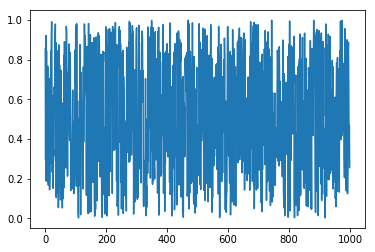

In [73]:
# pandas 数据可以直接观看其可视化形式
data.plot()

In [74]:
plt.show()

## 除了plot，我经常会用到还有scatter，这个会显示散点图，

## 首先给大家说一下在 pandas 中有多少种方法

#bar
#hist
#box
#kde
#area
#scatter
#hexbin

# Dataframe 可视化

In [75]:
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
    )
print(data)
#data.cumsum()
#data.plot()
#plt.show()

            A         B         C         D
0    2.132264  0.332568  0.077732  0.427195
1   -0.154477 -0.919288 -2.311701  1.009240
2   -2.055080 -0.595323  0.405480  1.069430
3    1.282211  0.631078 -0.204796  0.117148
4   -0.681482  1.080576 -0.336142 -0.143253
5    0.579434 -0.069729  0.194167  0.984948
6    0.396911  0.350770 -1.548694  0.363764
7    0.846568  1.359014 -0.069744 -0.825793
8    0.845390  0.321210  0.196672 -0.996971
9   -1.748898 -2.844236  1.726190  0.050178
10  -0.718720  1.608704  0.191673 -0.631915
11   0.729660  0.791331 -1.485223 -0.665726
12   0.313987 -0.146188  0.543127 -1.319967
13   1.020007  0.821468 -1.532077 -0.776759
14  -1.335706  0.616167  1.930750 -1.775637
15   0.254970 -0.032171 -0.801223 -1.152929
16  -0.869229 -1.206123 -1.013123  0.954462
17   0.944937  0.452192  1.007379  0.134014
18   0.047121 -1.505292 -0.476169 -0.418575
19   0.568896  2.310587  0.021249 -0.907063
20  -0.518429 -0.276991  0.574285 -0.609612
21  -1.059056  2.080791  0.28956

In [76]:
data.cumsum()
#data.plot()
#plt.show()

,A,B,C,D
0,2.132264,0.332568,0.077732,0.427195
1,1.977787,-0.586720,-2.233970,1.436435
2,-0.077293,-1.182043,-1.828489,2.505865
3,1.204918,-0.550965,-2.033285,2.623013
4,0.523436,0.529611,-2.369427,2.479760
5,1.102869,0.459882,-2.175260,3.464708
6,1.499781,0.810652,-3.723954,3.828471
7,2.346349,2.169666,-3.793698,3.002679
8,3.191739,2.490876,-3.597026,2.005708
9,1.442841,-0.353360,-1.870836,2.055885


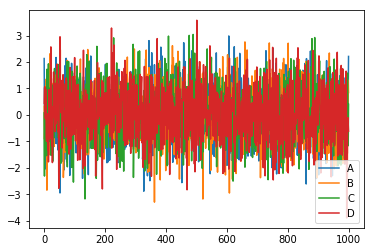

In [77]:
data.plot()
#plt.show()

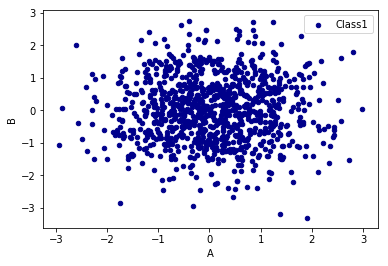

In [78]:
#scatter
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')

In [79]:
# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()